In [2]:
import pandas as pd
df_books = pd.read_csv('books.csv')
df_books.head()


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


In [6]:
#Data_Cleaning


df_cleaned = df_books.drop_duplicates()

relevant_columns = ['book_id', 'authors', 'original_publication_year', 
                    'original_title', 'average_rating', 'ratings_count', 'work_ratings_count']
df_harry_potter_cleaned = df_cleaned[relevant_columns]

missing_values = df_harry_potter_cleaned.isnull().sum()
print("\nMissing values before cleaning:")
print(missing_values)

df_harry_potter_cleaned = df_harry_potter_cleaned.dropna(subset=['original_title'])

median_year = int(df_harry_potter_cleaned['original_publication_year'].median(skipna=True))
df_harry_potter_cleaned['original_publication_year'] = df_harry_potter_cleaned['original_publication_year'].fillna(median_year).astype(int)

df_harry_potter_cleaned = df_harry_potter_cleaned[df_harry_potter_cleaned['original_title'].str.contains("Harry Potter", na=False, case=False)]

df_harry_potter_cleaned.reset_index(drop=True, inplace=True)

print("\nDataset after cleaning and filtering:")
print(df_harry_potter_cleaned.head())

print("\nMissing values after all cleaning:")
print(df_harry_potter_cleaned.isnull().sum())





Missing values before cleaning:
book_id                       0
authors                       0
original_publication_year     3
original_title               52
average_rating                0
ratings_count                 0
work_ratings_count            0
dtype: int64

Dataset after cleaning and filtering:
   book_id                                  authors  \
0        2              J.K. Rowling, Mary GrandPré   
1       18  J.K. Rowling, Mary GrandPré, Rufus Beck   
2       21              J.K. Rowling, Mary GrandPré   
3       23              J.K. Rowling, Mary GrandPré   
4       24              J.K. Rowling, Mary GrandPré   

   original_publication_year                             original_title  \
0                       1997   Harry Potter and the Philosopher's Stone   
1                       1999   Harry Potter and the Prisoner of Azkaban   
2                       2003  Harry Potter and the Order of the Phoenix   
3                       1998    Harry Potter and the Chamber

In [7]:
df_harry_potter_sorted = df_harry_potter_cleaned.sort_values(by='ratings_count', ascending=False)

print("Most Selling Harry Potter Books:")
print(df_harry_potter_sorted[['original_title', 'ratings_count']].head())


Most Selling Harry Potter Books:
                             original_title  ratings_count
0  Harry Potter and the Philosopher's Stone        4602479
1  Harry Potter and the Prisoner of Azkaban        1832823
3   Harry Potter and the Chamber of Secrets        1779331
4       Harry Potter and the Goblet of Fire        1753043
5      Harry Potter and the Deathly Hallows        1746574


In [8]:
average_rating_hp = df_harry_potter_cleaned['average_rating'].mean()

print(f"\nThe average rating of Harry Potter books is: {average_rating_hp:.2f}")



The average rating of Harry Potter books is: 4.49


/tmp/ipykernel_2514/1574638642.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


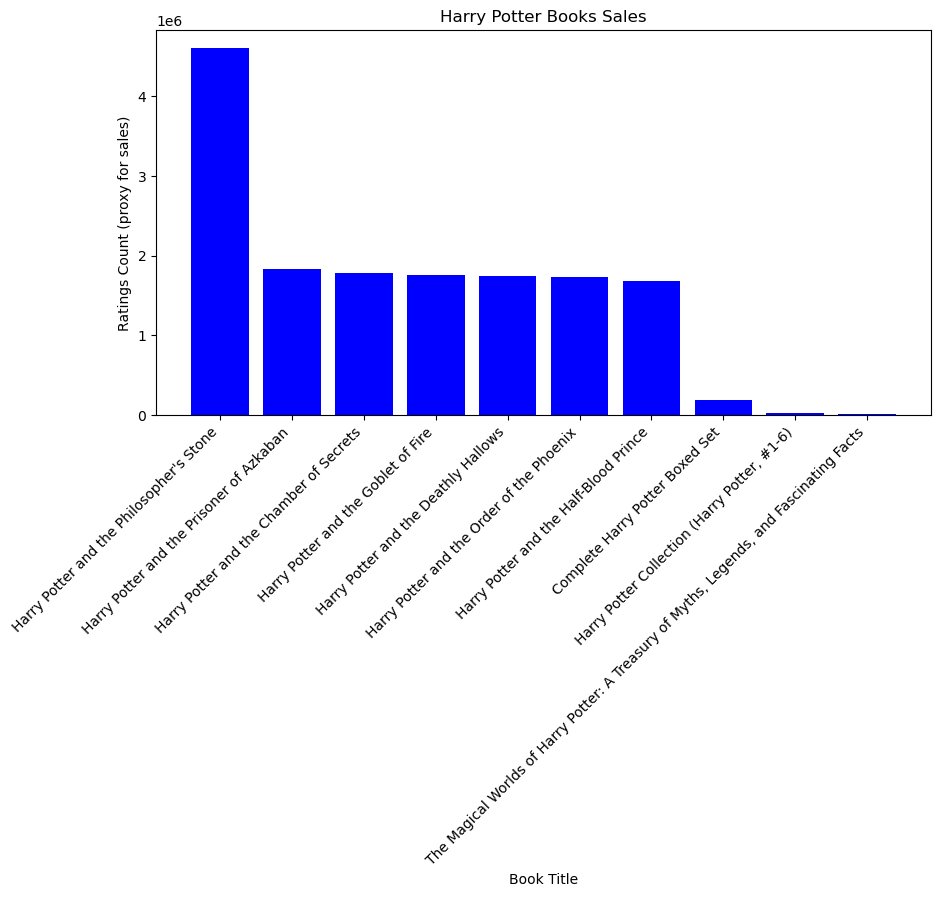

/tmp/ipykernel_2514/1574638642.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


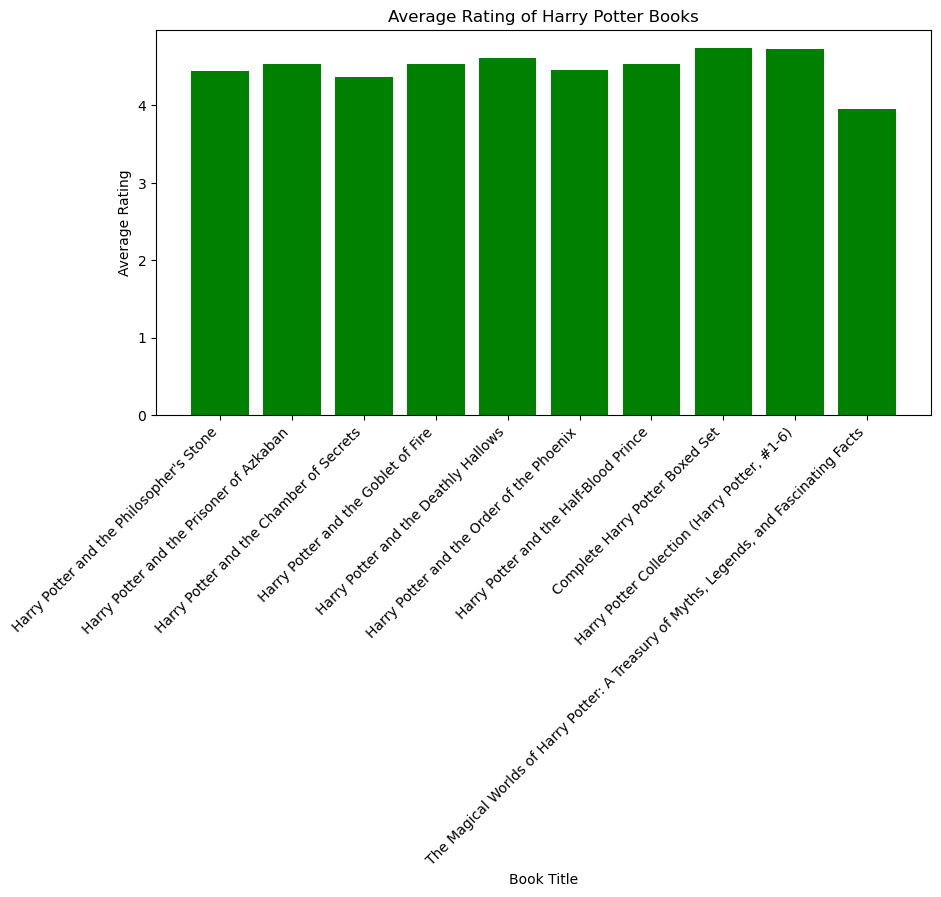

In [9]:
#Visulization-Additional step

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_harry_potter_sorted['original_title'], df_harry_potter_sorted['ratings_count'], color='blue')
plt.xlabel('Book Title')
plt.ylabel('Ratings Count (proxy for sales)')
plt.title('Harry Potter Books Sales')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(df_harry_potter_sorted['original_title'], df_harry_potter_sorted['average_rating'], color='green')
plt.xlabel('Book Title')
plt.ylabel('Average Rating')
plt.title('Average Rating of Harry Potter Books')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
